In [69]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns


In [3]:
database_name = 'telecom'
table_name = 'xdr_data'

In [4]:
connection_params = {'host': 'localhost', 'user': 'postgres',
                         'password': 'Postgresql', 'port': "5432",
                         'database': database_name }

engine = create_engine(f"postgresql+psycopg2://{connection_params['user']}:{connection_params['password']}@{connection_params['host']}:{connection_params['port']}/{connection_params['database']}")


In [5]:

# str or SQLAlchemy Select table (select or text object)
sql_query = 'SELECT * FROM xdr_data'

df = pd.read_sql(sql_query, con= engine)

In [6]:
df.shape

(150001, 55)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [ ]:
df.columns.tolist()

In [ ]:
df.skew(axis=0)

### Handling Missing Values

In [15]:
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [42]:
# How many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing (df):
    # calculate total number of cells in dataframe
    totalCells = np.prod(df.shape)

    # count the number of missing values per column
    missingCount = df.isnull().sum()

    # Calcualte total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    missingPercentage = round(((totalMissing/totalCells)*100), 2)
    #print(f"The Telecom database contains {missingPercentage}% missing values")
    return missingPercentage

print(f"The Telecom database contains {percent_missing (df)}% missing values")

The Telecom database contains 12.5% missing values


#### Let's work on the missing values by evaluating the percentage of each feature. After that, order them. Finally, remove the ones above `12%`

In [51]:
# converting the columns of our data into a list.
missing = []
col = df.columns.tolist()
# add corresponding feature and missing value percentage into missing[]
for i in col:
    missing.append((i, percent_missing(df[i])))
    
missing_percent = pd.DataFrame(missing, columns = ['Features', 'MissingPercentage'])
missing_sorted = missing_percent.sort_values(by='MissingPercentage', ascending=False)

# keep usefull columns
useful_columns = missing_sorted[missing_sorted['MissingPercentage']<12]['Features'].tolist()
df = df[useful_columns]
df

,Last Location Name,MSISDN/Number,Bearer Id,10 Kbps < UL TP < 50 Kbps (%),Nb of sec with Vol UL < 1250B,UL TP > 300 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP < 10 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),50 Kbps < DL TP < 250 Kbps (%),...,Dur. (ms).1,Start,Activity Duration DL (ms),Avg Bearer TP UL (kbps),Avg Bearer TP DL (kbps),Dur. (ms),End ms,End,Start ms,Total DL (Bytes)
0,9.16456699548519E+015,3.366496e+10,1.311448e+19,0.0,214.0,0.0,0.0,100.0,0.0,0.0,...,1.823653e+09,4/4/2019 12:01,37624.0,44.0,23.0,1823652.0,662.0,4/25/2019 14:35,770.0,308879636.0
1,L77566A,3.368185e+10,1.311448e+19,0.0,1022.0,0.0,0.0,100.0,0.0,0.0,...,1.365104e+09,4/9/2019 13:04,168.0,26.0,16.0,1365104.0,606.0,4/25/2019 8:15,235.0,653384965.0
2,D42335A,3.376063e+10,1.311448e+19,0.0,695.0,0.0,0.0,100.0,0.0,0.0,...,1.361763e+09,4/9/2019 17:42,0.0,9.0,6.0,1361762.0,652.0,4/25/2019 11:58,1.0,279807335.0
3,T21824A,3.375034e+10,1.311448e+19,0.0,207.0,0.0,0.0,100.0,0.0,0.0,...,1.321510e+09,4/10/2019 0:31,3330.0,44.0,44.0,1321509.0,171.0,4/25/2019 7:36,486.0,846028530.0
4,D88865A,3.369980e+10,1.311448e+19,0.0,604.0,0.0,0.0,100.0,0.0,0.0,...,1.089009e+09,4/12/2019 20:10,0.0,9.0,6.0,1089009.0,954.0,4/25/2019 10:40,565.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,D20434A,3.365069e+10,7.277826e+18,0.0,229.0,0.0,0.0,100.0,0.0,0.0,...,8.123076e+07,4/29/2019 7:28,42376.0,65.0,52.0,81230.0,214.0,4/30/2019 6:02,451.0,574175259.0
149997,D10223C,3.366345e+10,7.349883e+18,0.0,102.0,0.0,0.0,100.0,0.0,0.0,...,9.797070e+07,4/29/2019 7:28,17264.0,54.0,23.0,97970.0,187.0,4/30/2019 10:41,483.0,666648844.0
149998,T51102A,3.362189e+10,1.311448e+19,0.0,108.0,0.0,0.0,100.0,0.0,0.0,...,9.824953e+07,4/29/2019 7:28,25003.0,47.0,43.0,98249.0,810.0,4/30/2019 10:46,283.0,592786405.0
149999,L88342B,3.361962e+10,1.311448e+19,0.0,82.0,0.0,0.0,100.0,0.0,0.0,...,9.791063e+07,4/29/2019 7:28,13405.0,37.0,34.0,97910.0,327.0,4/30/2019 10:40,696.0,371895920.0


In [56]:
df.isnull().sum()

Last Location Name                1153
MSISDN/Number                     1066
Bearer Id                          991
10 Kbps < UL TP < 50 Kbps (%)      792
Nb of sec with Vol UL < 1250B      793
UL TP > 300 Kbps (%)               792
50 Kbps < UL TP < 300 Kbps (%)     792
UL TP < 10 Kbps (%)                792
250 Kbps < DL TP < 1 Mbps (%)      754
50 Kbps < DL TP < 250 Kbps (%)     754
DL TP < 50 Kbps (%)                754
Nb of sec with Vol DL < 6250B      755
DL TP > 1 Mbps (%)                 754
Handset Type                       572
Handset Manufacturer               572
IMEI                               572
IMSI                               570
Gaming UL (Bytes)                    0
Email UL (Bytes)                     0
Total UL (Bytes)                     1
Other UL (Bytes)                     0
Other DL (Bytes)                     0
Google UL (Bytes)                    0
Gaming DL (Bytes)                    0
Youtube DL (Bytes)                   0
Youtube UL (Bytes)       

#### Drop remaining missing values from our data

In [57]:
df = df.dropna()
df.isnull().sum()

Last Location Name                0
MSISDN/Number                     0
Bearer Id                         0
10 Kbps < UL TP < 50 Kbps (%)     0
Nb of sec with Vol UL < 1250B     0
UL TP > 300 Kbps (%)              0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP < 10 Kbps (%)               0
250 Kbps < DL TP < 1 Mbps (%)     0
50 Kbps < DL TP < 250 Kbps (%)    0
DL TP < 50 Kbps (%)               0
Nb of sec with Vol DL < 6250B     0
DL TP > 1 Mbps (%)                0
Handset Type                      0
Handset Manufacturer              0
IMEI                              0
IMSI                              0
Gaming UL (Bytes)                 0
Email UL (Bytes)                  0
Total UL (Bytes)                  0
Other UL (Bytes)                  0
Other DL (Bytes)                  0
Google UL (Bytes)                 0
Gaming DL (Bytes)                 0
Youtube DL (Bytes)                0
Youtube UL (Bytes)                0
Netflix DL (Bytes)                0
Netflix UL (Bytes)          

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146891 entries, 0 to 149999
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Last Location Name              146891 non-null  object 
 1   MSISDN/Number                   146891 non-null  float64
 2   Bearer Id                       146891 non-null  float64
 3   10 Kbps < UL TP < 50 Kbps (%)   146891 non-null  float64
 4   Nb of sec with Vol UL < 1250B   146891 non-null  float64
 5   UL TP > 300 Kbps (%)            146891 non-null  float64
 6   50 Kbps < UL TP < 300 Kbps (%)  146891 non-null  float64
 7   UL TP < 10 Kbps (%)             146891 non-null  float64
 8   250 Kbps < DL TP < 1 Mbps (%)   146891 non-null  float64
 9   50 Kbps < DL TP < 250 Kbps (%)  146891 non-null  float64
 10  DL TP < 50 Kbps (%)             146891 non-null  float64
 11  Nb of sec with Vol DL < 6250B   146891 non-null  float64
 12  DL TP > 1 Mbps (%)   

In [77]:
df.describe()

,MSISDN/Number,Bearer Id,10 Kbps < UL TP < 50 Kbps (%),Nb of sec with Vol UL < 1250B,UL TP > 300 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP < 10 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),50 Kbps < DL TP < 250 Kbps (%),DL TP < 50 Kbps (%),...,Social Media UL (Bytes),Social Media DL (Bytes),Dur. (ms).1,Activity Duration DL (ms),Avg Bearer TP UL (kbps),Avg Bearer TP DL (kbps),Dur. (ms),End ms,Start ms,Total DL (Bytes)
count,1.468910e+05,1.468910e+05,146891.000000,146891.000000,146891.000000,146891.000000,146891.000000,146891.000000,146891.000000,146891.000000,...,146891.000000,1.468910e+05,1.468910e+05,1.468910e+05,146891.000000,146891.000000,1.468910e+05,146891.000000,146891.000000,1.468910e+05
mean,3.596855e+10,1.014458e+19,0.778128,4053.016298,0.079630,0.148253,98.528290,1.721263,3.064762,92.837893,...,32915.532497,1.794825e+06,1.052304e+08,1.856778e+06,1788.190618,13419.455991,1.052299e+05,498.654397,499.117189,4.546628e+08
std,8.792026e+11,2.892813e+18,3.230678,10216.275737,1.304046,1.613103,4.643045,4.161456,6.212684,13.054204,...,19005.244514,1.035401e+06,8.092445e+07,5.744986e+06,4650.560582,24081.550773,8.092446e+04,288.073522,288.554839,2.442080e+08
min,3.360100e+10,6.917538e+18,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.200000e+01,7.142988e+06,0.000000e+00,0.000000,0.000000,7.142000e+03,0.000000,0.000000,7.114041e+06
25%,3.365128e+10,7.349883e+18,0.000000,107.000000,0.000000,0.000000,99.000000,0.000000,0.000000,91.000000,...,16431.000000,8.980890e+05,5.852759e+07,1.541800e+04,47.000000,43.000000,5.852700e+04,251.000000,250.000000,2.430767e+08
50%,3.366369e+10,7.349883e+18,0.000000,217.000000,0.000000,0.000000,100.000000,0.000000,0.000000,100.000000,...,32908.000000,1.793409e+06,8.639999e+07,3.972400e+04,63.000000,64.000000,8.639900e+04,500.000000,499.000000,4.559702e+08
75%,3.368344e+10,1.304243e+19,0.000000,2466.000000,0.000000,0.000000,100.000000,1.000000,4.000000,100.000000,...,49326.500000,2.694640e+06,1.331551e+08,6.972615e+05,1136.000000,20023.500000,1.331545e+05,750.000000,749.000000,6.657831e+08
max,3.370000e+14,1.318654e+19,98.000000,604122.000000,96.000000,85.000000,100.000000,76.000000,93.000000,100.000000,...,65870.000000,3.586064e+06,1.859336e+09,1.365365e+08,58613.000000,378160.000000,1.859336e+06,999.000000,999.000000,9.029696e+08


For the actual telecom dataset, you‘re expected to conduct a full User Overview analysis & the following sub-tasks are your guidance: 
- Start by identifying the top 10 handsets used by the customers.
- Then, identify the top 3 handset manufacturers
- Next, identify the top 5 handsets per top 3 handset manufacturer
- Make a short interpretation and recommendation to marketing teams


In [126]:
df.groupby(['Handset Manufacturer', 'Handset Type'])['Handset Type'].sum()

Handset Manufacturer                     Handset Type                                                                       
A-Link Telecom International Co Limited  A-Link Telecom I. Cubot A5                                                                                    A-Link Telecom I. Cubot A5
                                         A-Link Telecom I. Cubot Note Plus                                                                      A-Link Telecom I. Cubot Note Plus
                                         A-Link Telecom I. Cubot Note S                                                                            A-Link Telecom I. Cubot Note S
                                         A-Link Telecom I. Cubot Nova                                                                                A-Link Telecom I. Cubot Nova
                                         A-Link Telecom I. Cubot Power                                                                              A-Link Telecom 

In [110]:
def top_10_handsets(data):
    data['Handset Type'].value_counts()[:10].plot.bar(figsize=(10, 5))
    plt.title(f'Top 10 Handsets used by the customers', size=15, fontweight='bold')
    plt.xlabel("Handsets Type", size=18); plt.ylabel("Usage Frequency", size=14);
    plt.xticks(size=12); plt.yticks(size=12);
    plt.show()

def top_3_manufacturers(data):
    data['Handset Manufacturer'].value_counts()[:3].plot.bar()
    plt.title(f'Top 3 Handset Manufacturers', fontweight= 'bold')
    plt.xlabel("Handset Manufacturers"); 
    plt.ylabel("Frequency");
    plt.show()


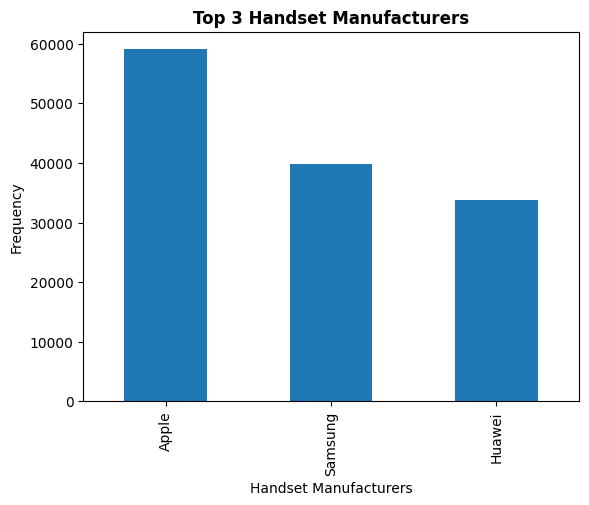

In [111]:

top_3_manufacturers(df)

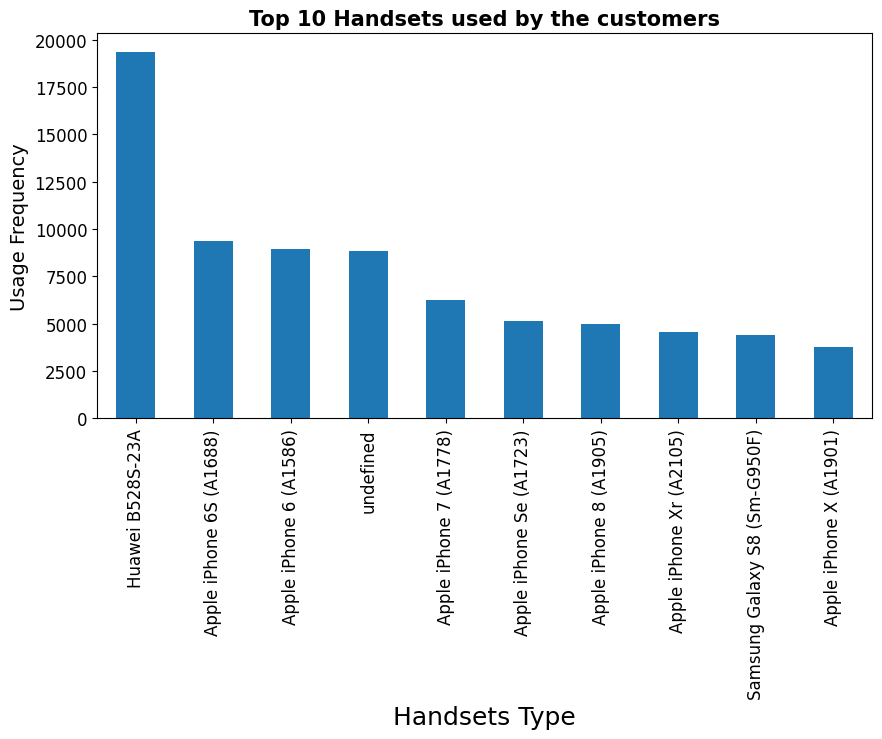

In [112]:
top_10_handsets(df)

Task 2.1 - Your employer wants to have an overview of the users’ behaviour on those applications.   
Aggregate per user the following information in the column  
- number of xDR sessions
- Session duration
- the total download (DL) and upload (UL) data
- the total data volume (in Bytes) during this session for each application


In [63]:
df.groupby('MSISDN/Number')['IMSI'].sum()

MSISDN/Number
3.360100e+10    2.082014e+14
3.360100e+10    2.082015e+14
3.360100e+10    2.082019e+14
3.360101e+10    2.082017e+14
3.360101e+10    4.164031e+14
                    ...     
3.378997e+10    2.082015e+14
3.378998e+10    4.164035e+14
3.379000e+10    2.082014e+14
3.379000e+10    2.082010e+14
3.370000e+14    2.082095e+14
Name: IMSI, Length: 105719, dtype: float64